In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


In [2]:
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

In [4]:
ticker = "MSFT"
df = yf.download(
    ticker,
    "2020-01-01"
)

[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,152.505676,152.610120,150.331371,150.758634,22622100
2020-01-03,150.606720,151.869532,150.075013,150.321887,21116200
2020-01-06,150.996033,151.062503,148.603335,149.144547,20813700
2020-01-07,149.619278,151.603691,149.372418,151.271381,21634100
2020-01-08,152.002426,152.676564,149.970537,150.901025,27746500
...,...,...,...,...,...
2026-01-21,444.109985,452.690002,438.679993,452.600006,37980500
2026-01-22,451.140015,452.839996,444.700012,447.619995,25349400


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,152.505676,152.610120,150.331371,150.758634,22622100
2020-01-03,150.606720,151.869532,150.075013,150.321887,21116200
2020-01-06,150.996033,151.062503,148.603335,149.144547,20813700
2020-01-07,149.619278,151.603691,149.372418,151.271381,21634100
2020-01-08,152.002426,152.676564,149.970537,150.901025,27746500


<Axes: xlabel='Date'>

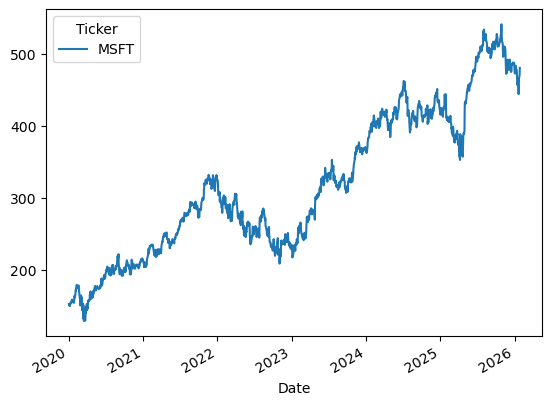

In [7]:
df.Close.plot()

In [8]:
scaler=StandardScaler()
df['Close']=scaler.fit_transform(df['Close'])

In [9]:
df.Close.tail()

Ticker,MSFT
Date,
2026-01-21,1.239805
2026-01-22,1.308830
2026-01-23,1.454243
2026-01-26,1.496758
2026-01-27,1.597889


In [10]:
seq_length=30

data=[]
for i in range (len(df)-seq_length):
    data.append(df.Close[i:i+seq_length])



In [11]:
data

[Ticker          MSFT
 Date                
 2020-01-02 -1.623342
 2020-01-03 -1.641987
 2020-01-06 -1.638164
 2020-01-07 -1.651682
 2020-01-08 -1.628283
 2020-01-09 -1.609637
 2020-01-10 -1.616630
 2020-01-13 -1.598543
 2020-01-14 -1.609265
 2020-01-15 -1.599476
 2020-01-16 -1.571601
 2020-01-17 -1.562932
 2020-01-21 -1.568525
 2020-01-22 -1.575983
 2020-01-23 -1.566474
 2020-01-24 -1.582136
 2020-01-27 -1.607866
 2020-01-28 -1.578220
 2020-01-29 -1.554169
 2020-01-30 -1.509979
 2020-01-31 -1.533751
 2020-02-03 -1.495063
 2020-02-04 -1.441551
 2020-02-05 -1.443602
 2020-02-06 -1.408829
 2020-02-07 -1.406405
 2020-02-10 -1.361564
 2020-02-11 -1.401278
 2020-02-12 -1.398761
 2020-02-13 -1.408083,
 Ticker          MSFT
 Date                
 2020-01-03 -1.641987
 2020-01-06 -1.638164
 2020-01-07 -1.651682
 2020-01-08 -1.628283
 2020-01-09 -1.609637
 2020-01-10 -1.616630
 2020-01-13 -1.598543
 2020-01-14 -1.609265
 2020-01-15 -1.599476
 2020-01-16 -1.571601
 2020-01-17 -1.562932
 2020-01-

In [12]:
data=np.array(data)

In [13]:
print(data.shape)

(1495, 30, 1)


In [14]:
len(data)

1495

In [15]:
train_size=int(len(data))-7

In [16]:
x_train=torch.from_numpy(data[:train_size,:-1,:]).type(torch.Tensor).to(device)
y_train=torch.from_numpy(data[:train_size,-1,:]).type(torch.Tensor).to(device)
x_test=torch.from_numpy(data[train_size:,:-1,:]).type(torch.Tensor).to(device)
y_test=torch.from_numpy(data[train_size:,-1,:]).type(torch.Tensor).to(device)

In [17]:
data[:train_size,:-1,:]

array([[[-1.62334175],
        [-1.64198685],
        [-1.63816434],
        ...,
        [-1.36156371],
        [-1.40127783],
        [-1.39876056]],

       [[-1.64198685],
        [-1.63816434],
        [-1.65168215],
        ...,
        [-1.40127783],
        [-1.39876056],
        [-1.40808326]],

       [[-1.63816434],
        [-1.65168215],
        [-1.62828296],
        ...,
        [-1.39876056],
        [-1.40808326],
        [-1.39279443]],

       ...,

       [[ 1.71011613],
        [ 1.65837191],
        [ 1.69038064],
        ...,
        [ 1.62626519],
        [ 1.57363732],
        [ 1.58512522]],

       [[ 1.65837191],
        [ 1.69038064],
        [ 1.56990651],
        ...,
        [ 1.57363732],
        [ 1.58512522],
        [ 1.5645061 ]],

       [[ 1.69038064],
        [ 1.56990651],
        [ 1.60044222],
        ...,
        [ 1.58512522],
        [ 1.5645061 ],
        [ 1.5005872 ]]], shape=(1488, 29, 1))

In [18]:
data[:train_size,-1,:]

array([[-1.40808326],
       [-1.39279443],
       [-1.37526744],
       ...,
       [ 1.5645061 ],
       [ 1.5005872 ],
       [ 1.3897351 ]], shape=(1488, 1))

In [20]:
class predictionmodel(nn.Module):
    def __init__(self,input_dim,hidden_dim,num_layers,output_dim):
        super(predictionmodel,self).__init__()

        self.num_layers=num_layers
        self.hidden_dim=hidden_dim

        self.lstm=nn.LSTM(input_dim,hidden_dim,num_layers,batch_first=True)
        self.fc=nn.Linear(hidden_dim,output_dim)

    def forward(self,x):
        h0=torch.zeros(self.num_layers,x.size(0),self.hidden_dim,device=device)
        c0=torch.zeros(self.num_layers,x.size(0),self.hidden_dim,device=device)

        out,(hn,cn)=self.lstm(x,(h0.detach(),c0.detach()))

        out=self.fc(out[:,-1,:])

        return out
        


In [21]:
model=predictionmodel(input_dim=1,hidden_dim=32,num_layers=2,output_dim=1).to(device)

In [22]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [23]:
num_epochs=1000

for i in range(num_epochs):
    y_train_pred=model(x_train)
    loss=criterion(y_train_pred,y_train)
    if i%25==0:
        print(i,loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 tensor(0.9817, device='cuda:0', grad_fn=<MseLossBackward0>)
25 tensor(0.0314, device='cuda:0', grad_fn=<MseLossBackward0>)
50 tensor(0.0063, device='cuda:0', grad_fn=<MseLossBackward0>)
75 tensor(0.0045, device='cuda:0', grad_fn=<MseLossBackward0>)
100 tensor(0.0042, device='cuda:0', grad_fn=<MseLossBackward0>)
125 tensor(0.0041, device='cuda:0', grad_fn=<MseLossBackward0>)
150 tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward0>)
175 tensor(0.0038, device='cuda:0', grad_fn=<MseLossBackward0>)
200 tensor(0.0036, device='cuda:0', grad_fn=<MseLossBackward0>)
225 tensor(0.0035, device='cuda:0', grad_fn=<MseLossBackward0>)
250 tensor(0.0033, device='cuda:0', grad_fn=<MseLossBackward0>)
275 tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward0>)
300 tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>)
325 tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward0>)
350 tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>)
375 tensor(0.0028, device='cuda:0', grad_fn=<

In [30]:
model.eval()

with torch.no_grad():
    y_train_pred = model(x_train)
    y_test_pred  = model(x_test)

In [31]:
y_train_pred = y_train_pred.cpu().numpy().reshape(-1, 1)
y_test_pred  = y_test_pred.cpu().numpy().reshape(-1, 1)

y_train_true = y_train.cpu().numpy().reshape(-1, 1)
y_test_true  = y_test.cpu().numpy().reshape(-1, 1)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred  = scaler.inverse_transform(y_test_pred)

y_train_true = scaler.inverse_transform(y_train_true)
y_test_true  = scaler.inverse_transform(y_test_true)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
train_rmse = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test_true, y_test_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE : {test_rmse:.4f}")

Train RMSE: 5.0914
Test RMSE : 8.1263


In [28]:
import matplotlib.pyplot as plt


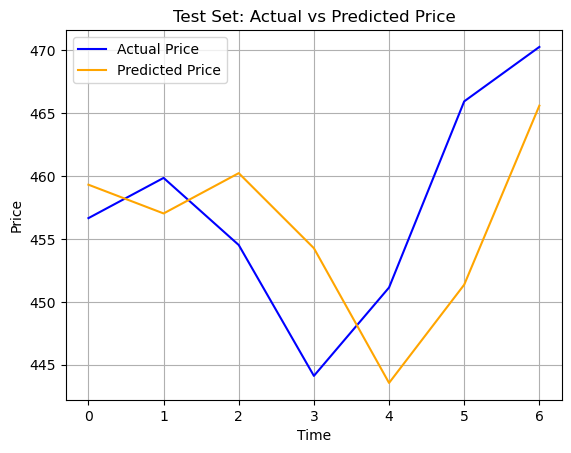

In [63]:
plt.figure()
plt.plot(y_test_true, label="Actual Price", color="blue")
plt.plot(y_test_pred, label="Predicted Price", color="orange")
plt.title("Test Set: Actual vs Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [65]:
y_pred = y_test_pred.squeeze()
y_test_true = y_test_true.squeeze()

std = np.std(y_pred)

lower = y_pred - std
upper = y_pred + std



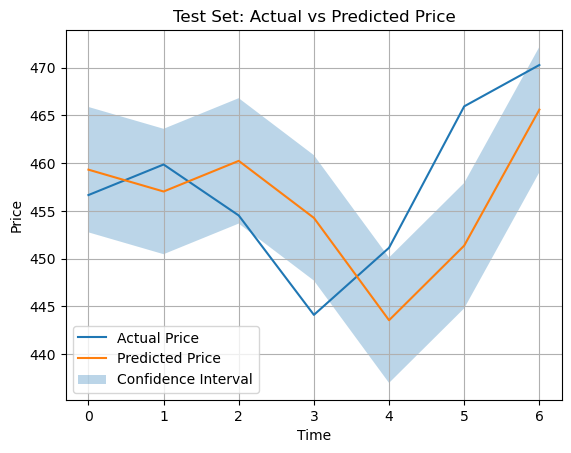

In [66]:
plt.figure()

plt.plot(y_test_true, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")

plt.fill_between(
    range(len(y_pred)),
    lower,
    upper,
    alpha=0.3,
    label="Confidence Interval"
)

plt.title("Test Set: Actual vs Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
